# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [25]:
df_train = pd.read_csv('har_train.csv')
df_test = pd.read_csv('har_test.csv')

y_train = df_train['V1']
X_train = df_train.drop(['V1', 'y'], axis=1)

y_test = df_test['V1']
X_test = df_test.drop(['V1', 'y'], axis=1)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [26]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [27]:
clf = DecisionTreeClassifier(random_state=2360873, max_depth=4).fit(X_train, y_train)

In [28]:
importances = clf.feature_importances_

# Crie um DataFrame com as importâncias e nomes das variáveis
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Ordene o DataFrame pela coluna 'importance' em ordem decrescente
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Selecione as 3 variáveis mais importantes
top_3_features = importance_df.head(3)

print(top_3_features)


                   feature  importance
52    X53tGravityAcc.min.X    0.283674
265    X266fBodyAcc.mean.X    0.254900
559  X560angleYgravityMean    0.166670


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

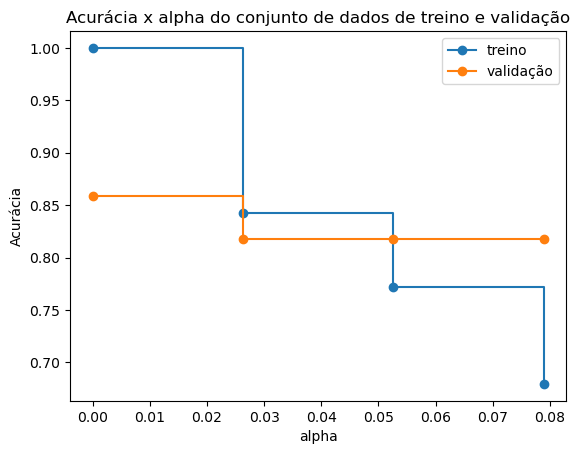

Wall time: 217 ms


In [29]:
%%time

X_valid = X_valid[['X53tGravityAcc.min.X', 'X266fBodyAcc.mean.X','X560angleYgravityMean']]
X_test = X_test[['X53tGravityAcc.min.X', 'X266fBodyAcc.mean.X','X560angleYgravityMean']]
X_train = X_train[['X53tGravityAcc.min.X', 'X266fBodyAcc.mean.X','X560angleYgravityMean']]



clf0 = DecisionTreeClassifier(random_state=42)
path = clf0.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = np.linspace(0, 0.1, num=20)[::5]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [30]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 75.03


DecisionTreeClassifier(ccp_alpha=0.02631578947368421, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 73.26


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


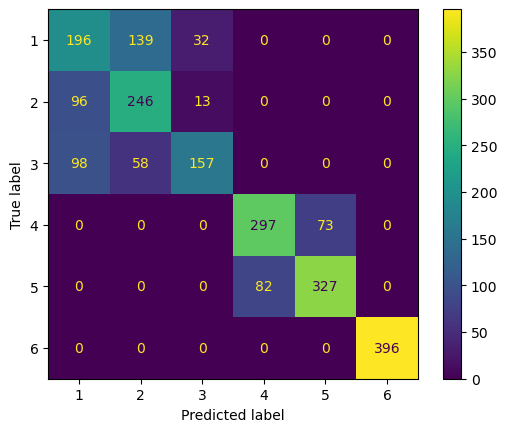

In [31]:
acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test, y_test);